In [68]:
import time
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy

from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.util import ngrams

In [57]:
sns.set()

## Setup tweepy api client

In [2]:
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

In [3]:
# Use tweepy to invoke Twitter API

# Set app and user access tokens
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create API client
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
# Request MBTA timeline

username = 'mbta'
timeout = 999999

In [104]:
def get_status_text(status):
    if hasattr(status, "retweeted_status"):  # Check if Retweet
        try:
            return status.retweeted_status.extended_tweet["full_text"]
        except AttributeError:
            return status.retweeted_status.text
    else:
        try:
            return status.extended_tweet["full_text"]
        except AttributeError:
            return status.text

In [8]:
# Define helper function for parsing Twitter API tweet responses

def parse_tweet(tweet):
    """
    Selects relevant fields from tweet status object
    https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
    """
    return {
            'user_id': tweet.user.id,
            'user_screenname': tweet.user.screen_name,
            'text': get_status_text(tweet),
            'truncated': tweet.truncated,
            'created_at': tweet.created_at,
            'id_str': tweet.id_str,
            'in_reply_to_status_id_str': tweet.in_reply_to_status_id_str,
            'retweet_count': tweet.retweet_count,
            'favorite_count': tweet.favorite_count or 0,
            'media': tweet.entities.media if hasattr(tweet.entities, 'media') else [],
            'lang': tweet.lang if hasattr(tweet, 'lang') else 'und',
        }

## Request @MBTA user timeline
Returns up to 3200 most recent tweets on user timeline

In [9]:
tweets = []

try: 
    for tweet in tweepy.Cursor(api.user_timeline,id=username,timeout=timeout).items(1000):
        tweets.append(parse_tweet(tweet))
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
except tweepy.RateLimitError:
    time.sleep(15 * 60)

print(f"Fetched {len(tweets)} tweets.")

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 23 02:05:11 +0000 2020', 'id': 1220165550875250691, 'id_str': '1220165550875250691', 'text': '@terenwong Good evening Teren. Thanks for letting us know about this. We have notified Green Line officials about t… https://t.co/rmGmyn7xKJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'terenwong', 'name': 'Teren Wong', 'id': 68315774, 'id_str': '68315774', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/rmGmyn7xKJ', 'expanded_url': 'https://twitter.com/i/web/status/1220165550875250691', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1220164361165180928, 'in_reply_to_status_id_str': '1220164361165180928', 'in_reply_to_user_id': 68315774, 'in_reply_to_user_id_str': '68315774', 'in_reply_to_screen_name': 'terenw

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Jan 22 21:55:43 +0000 2020', 'id': 1220102772307189761, 'id_str': '1220102772307189761', 'text': '@lockedandkeyed Good evening. Can you please let us know specifically which fare gates are open at Kendall so we ca… https://t.co/eT30cVQKh8', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'lockedandkeyed', 'name': '🌟✨ néw yęær’s bästärd ✨🌟', 'id': 3233658617, 'id_str': '3233658617', 'indices': [0, 15]}], 'urls': [{'url': 'https://t.co/eT30cVQKh8', 'expanded_url': 'https://twitter.com/i/web/status/1220102772307189761', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1220101256846487552, 'in_reply_to_status_id_str': '1220101256846487552', 'in_reply_to_user_id': 3233658617, 'in_reply_to_user_id_str': '3233658617', 'in_rep

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Jan 22 14:05:43 +0000 2020', 'id': 1219984489021157377, 'id_str': '1219984489021157377', 'text': '#MBTA #GreenLine Update: Delays of up to 15 minutes due to a power problem at Park Street. Customers can use Orange… https://t.co/NhXpjiCyg5', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'GreenLine', 'indices': [6, 16]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NhXpjiCyg5', 'expanded_url': 'https://twitter.com/i/web/status/1219984489021157377', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 21 22:19:30 +0000 2020', 'id': 1219746368522215425, 'id_str': '1219746368522215425', 'text': "@walshcaitlin Hi Caitlin! We're glad you are looking forward to riding our new Orange Line trains. There are two ne… https://t.co/2U0r8cP0Oy", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'walshcaitlin', 'name': 'Caitlin 🏳️\u200d🌈🖖', 'id': 19615011, 'id_str': '19615011', 'indices': [0, 13]}], 'urls': [{'url': 'https://t.co/2U0r8cP0Oy', 'expanded_url': 'https://twitter.com/i/web/status/1219746368522215425', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1219745682711633921, 'in_reply_to_status_id_str': '1219745682711633921', 'in_reply_to_user_id': 19615011, 'in_reply_to_user_id_str': '19615011', 'in_reply_to_screen_nam

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 21 17:00:26 +0000 2020', 'id': 1219666071168352256, 'id_str': '1219666071168352256', 'text': 'Over the weekend, we resumed acceleration work on the Orange Line between Sullivan Sq &amp; Tufts. With full access, we… https://t.co/NgGCs17aQq', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NgGCs17aQq', 'expanded_url': 'https://twitter.com/i/web/status/1219666071168352256', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of th

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 20 22:46:50 +0000 2020', 'id': 1219390857352241154, 'id_str': '1219390857352241154', 'text': '@es__bee Good evening. Thanks for sending this to us. Green Line E trains are running out of Lechmere approximately… https://t.co/36r8YhBLZL', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'es__bee', 'name': 'SB', 'id': 2765009551, 'id_str': '2765009551', 'indices': [0, 8]}], 'urls': [{'url': 'https://t.co/36r8YhBLZL', 'expanded_url': 'https://twitter.com/i/web/status/1219390857352241154', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1219390142575673344, 'in_reply_to_status_id_str': '1219390142575673344', 'in_reply_to_user_id': 2765009551, 'in_reply_to_user_id_str': '2765009551', 'in_reply_to_screen_name': 'es__bee',

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 20 16:50:33 +0000 2020', 'id': 1219301197674418176, 'id_str': '1219301197674418176', 'text': '#MBTA #RedLine: Delays of up to 10 minutes southbound due to a train with a mechanical issue at Central. The train… https://t.co/tfm3VlDclW', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'RedLine', 'indices': [6, 14]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tfm3VlDclW', 'expanded_url': 'https://twitter.com/i/web/status/1219301197674418176', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA'

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 20 11:30:25 +0000 2020', 'id': 1219220631281131520, 'id_str': '1219220631281131520', 'text': 'Today, January 20, is Martin Luther King Jr. Day.\n- Subway and bus service is running on a Saturday schedule.\n- Sil… https://t.co/MQFsrq5A1Z', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MQFsrq5A1Z', 'expanded_url': 'https://twitter.com/i/web/status/1219220631281131520', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the 

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sun Jan 19 18:17:01 +0000 2020', 'id': 1218960570977783809, 'id_str': '1218960570977783809', 'text': '@KELS0 Hi Kelsey. Yes the Charlie Card store is closed tomorrow for MLK day. It will resume its normal hours of ope… https://t.co/dXRoJPBxC0', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KELS0', 'name': 'Kelsey Mancini', 'id': 273203910, 'id_str': '273203910', 'indices': [0, 6]}], 'urls': [{'url': 'https://t.co/dXRoJPBxC0', 'expanded_url': 'https://twitter.com/i/web/status/1218960570977783809', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': 1218956709932257282, 'in_reply_to_status_id_str': '1218956709932257282', 'in_reply_to_user_id': 273203910, 'in_reply_to_user_id_str': '273203910', 'in_reply_to_screen_name': 'KELS0', 'user': {

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sat Jan 18 19:30:16 +0000 2020', 'id': 1218616613978759170, 'id_str': '1218616613978759170', 'text': 'Check out https://t.co/E84IuZBdOL for a complete guide on how to navigate this weekend’s Orange Line diversion. \n\nA… https://t.co/OY3cmLURIm', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/E84IuZBdOL', 'expanded_url': 'http://mbta.com/OLwork', 'display_url': 'mbta.com/OLwork', 'indices': [10, 33]}, {'url': 'https://t.co/OY3cmLURIm', 'expanded_url': 'https://twitter.com/i/web/status/1218616613978759170', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1218616585243582465, 'in_reply_to_status_id_str': '1218616585243582465', 'in_reply_to_user_id': 150334831, 'in_reply_to_user_id_str': '150334831', 'in_reply_to_scre

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Jan 17 22:56:08 +0000 2020', 'id': 1218306033975808001, 'id_str': '1218306033975808001', 'text': 'Shuttle buses replace Green Line B trains between Washington Street and Boston College because of an auto blocking… https://t.co/EE7ibCw876', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/EE7ibCw876', 'expanded_url': 'https://twitter.com/i/web/status/1218306033975808001', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Jan 17 14:30:00 +0000 2020', 'id': 1218178663255953408, 'id_str': '1218178663255953408', 'text': '#MBTA #OrangeLine: No train service between Sullivan and Tufts Medical Center this weekend (starting Friday at 8:45… https://t.co/IrbH5jjbqN', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'OrangeLine', 'indices': [6, 17]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/IrbH5jjbqN', 'expanded_url': 'https://twitter.com/i/web/status/1218178663255953408', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Jan 17 03:21:39 +0000 2020', 'id': 1218010468834578433, 'id_str': '1218010468834578433', 'text': '@nonoshhh Good evening Nyree. Thank you for giving us this feedback. We will pass your concern to our department th… https://t.co/FNvOZnKcYU', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nonoshhh', 'name': 'Nyree_Kibs', 'id': 531674088, 'id_str': '531674088', 'indices': [0, 9]}], 'urls': [{'url': 'https://t.co/FNvOZnKcYU', 'expanded_url': 'https://twitter.com/i/web/status/1218010468834578433', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1218001914153095174, 'in_reply_to_status_id_str': '1218001914153095174', 'in_reply_to_user_id': 531674088, 'in_reply_to_user_id_str': '531674088', 'in_reply_to_screen_name': 'nono

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 16 19:57:58 +0000 2020', 'id': 1217898809495257089, 'id_str': '1217898809495257089', 'text': '@boondaburrah Hello there. The new Orange Line trains feature several audible indications to assist passengers who… https://t.co/8sOnIis3ao', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'boondaburrah', 'name': 'LukÄç.jpg.exe', 'id': 30144512, 'id_str': '30144512', 'indices': [0, 13]}], 'urls': [{'url': 'https://t.co/8sOnIis3ao', 'expanded_url': 'https://twitter.com/i/web/status/1217898809495257089', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1217898082039468034, 'in_reply_to_status_id_str': '1217898082039468034', 'in_reply_to_user_id': 30144512, 'in_reply_to_user_id_str': '30144512', 'in_reply_to_screen_name': 'b

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 16 12:55:12 +0000 2020', 'id': 1217792419372175360, 'id_str': '1217792419372175360', 'text': 'New Orange Line Cars Update: \nToday we’re returning another new train to service. As with the first train, the root… https://t.co/f6IcQiE2Ht', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/f6IcQiE2Ht', 'expanded_url': 'https://twitter.com/i/web/status/1217792419372175360', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter 

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Jan 15 22:00:18 +0000 2020', 'id': 1217567209700122624, 'id_str': '1217567209700122624', 'text': 'Harvard Busway is the 3rd busiest stop with 16,000 riders daily. In Dec, we reopened the Upper Busway after renovat… https://t.co/juririsZQw', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/juririsZQw', 'expanded_url': 'https://twitter.com/i/web/status/1217567209700122624', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the Ma

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 14 23:06:49 +0000 2020', 'id': 1217221561494704128, 'id_str': '1217221561494704128', 'text': '@allstonratcity Thanks for letting us know. Please reach out to our customer service team at 617-222-3200, or via o… https://t.co/0H14oAuAqy', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'allstonratcity', 'name': 'bernie is the only one who can beat trump', 'id': 257340777, 'id_str': '257340777', 'indices': [0, 15]}], 'urls': [{'url': 'https://t.co/0H14oAuAqy', 'expanded_url': 'https://twitter.com/i/web/status/1217221561494704128', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1217217390548787200, 'in_reply_to_status_id_str': '1217217390548787200', 'in_reply_to_user_id': 257340777, 'in_reply_to_user_id_str': '257340

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 14 13:30:28 +0000 2020', 'id': 1217076517949313030, 'id_str': '1217076517949313030', 'text': 'The Town of Watertown is the latest community to offer MBTA Youth Passes for greater access to affordable transit.… https://t.co/4ZOYnNvtYS', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4ZOYnNvtYS', 'expanded_url': 'https://twitter.com/i/web/status/1217076517949313030', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the Mas

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 13 22:07:24 +0000 2020', 'id': 1216844221363228672, 'id_str': '1216844221363228672', 'text': '@mattjlawlor Hi Matt. Thanks for your question. We are currently removing the train from service during weekends to… https://t.co/PnUhdVCNpX', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mattjlawlor', 'name': 'Matthew Lawlor', 'id': 492675249, 'id_str': '492675249', 'indices': [0, 12]}], 'urls': [{'url': 'https://t.co/PnUhdVCNpX', 'expanded_url': 'https://twitter.com/i/web/status/1216844221363228672', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1216697195698839563, 'in_reply_to_status_id_str': '1216697195698839563', 'in_reply_to_user_id': 492675249, 'in_reply_to_user_id_str': '492675249', 'in_reply_to_screen_name': 'mattjlaw

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 13 14:09:17 +0000 2020', 'id': 1216723896675815424, 'id_str': '1216723896675815424', 'text': "@megs008 We don't see a specific window for renewing expiring TAP cards, however due to the number of applications… https://t.co/INrSo1XMwo", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'megs008', 'name': 'Meghan', 'id': 23452153, 'id_str': '23452153', 'indices': [0, 8]}], 'urls': [{'url': 'https://t.co/INrSo1XMwo', 'expanded_url': 'https://twitter.com/i/web/status/1216723896675815424', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1216720824771715072, 'in_reply_to_status_id_str': '1216720824771715072', 'in_reply_to_user_id': 23452153, 'in_reply_to_user_id_str': '23452153', 'in_reply_to_screen_name': 'megs008', 'use

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sun Jan 12 17:54:19 +0000 2020', 'id': 1216418142861320205, 'id_str': '1216418142861320205', 'text': 'Shuttle buses replacing Green Line service from North Station to Lechmere due to a wire problem at Haymarket. Passe… https://t.co/dPICYZt24p', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/dPICYZt24p', 'expanded_url': 'https://twitter.com/i/web/status/1216418142861320205', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of th

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sat Jan 11 20:23:55 +0000 2020', 'id': 1216093402145722374, 'id_str': '1216093402145722374', 'text': '@KELS0 Please contact Customer Support at 617-222-3200 or visit the CharlieCard Store in Downtown Crossing. The hou… https://t.co/KaXv0YneNj', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KELS0', 'name': 'Kelsey Mancini', 'id': 273203910, 'id_str': '273203910', 'indices': [0, 6]}], 'urls': [{'url': 'https://t.co/KaXv0YneNj', 'expanded_url': 'https://twitter.com/i/web/status/1216093402145722374', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1216091390268059648, 'in_reply_to_status_id_str': '1216091390268059648', 'in_reply_to_user_id': 273203910, 'in_reply_to_user_id_str': '273203910', 'in_reply_to_screen_name': 'KEL

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Jan 10 19:00:15 +0000 2020', 'id': 1215709957729017856, 'id_str': '1215709957729017856', 'text': 'We’re maintaining the momentum of #BuildingABetterT through 2020 with work resuming Jan 17 on the Orange Line. Week… https://t.co/8gpojMF12F', 'truncated': True, 'entities': {'hashtags': [{'text': 'BuildingABetterT', 'indices': [34, 51]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/8gpojMF12F', 'expanded_url': 'https://twitter.com/i/web/status/1215709957729017856', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'd

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 09 21:46:27 +0000 2020', 'id': 1215389396045910016, 'id_str': '1215389396045910016', 'text': '@TrainDisciple A emergency exercise drill will be performed at Bowdoin Sta from 6 AM to 12 PM on Jan 12 - one side… https://t.co/QUjT9e9pcz', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TrainDisciple', 'name': '💯 percent', 'id': 22827478, 'id_str': '22827478', 'indices': [0, 14]}], 'urls': [{'url': 'https://t.co/QUjT9e9pcz', 'expanded_url': 'https://twitter.com/i/web/status/1215389396045910016', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1215388128367796224, 'in_reply_to_status_id_str': '1215388128367796224', 'in_reply_to_user_id': 22827478, 'in_reply_to_user_id_str': '22827478', 'in_reply_to_screen_name': 'Trai

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 09 13:02:33 +0000 2020', 'id': 1215257553065607168, 'id_str': '1215257553065607168', 'text': '#MBTA #RedLine Ashmont Branch Update: Delays of up to 15 minutes northbound due to a train with an earlier mechanic… https://t.co/WBk0dGwbhc', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'RedLine', 'indices': [6, 14]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WBk0dGwbhc', 'expanded_url': 'https://twitter.com/i/web/status/1215257553065607168', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_na

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Jan 08 14:57:18 +0000 2020', 'id': 1214924042165215233, 'id_str': '1214924042165215233', 'text': 'Orange Line experiencing northbound delays of up to 10 minutes due to a passenger requiring medical assistance on b… https://t.co/gimbbHGbdv', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gimbbHGbdv', 'expanded_url': 'https://twitter.com/i/web/status/1214924042165215233', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of th

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 07 22:05:24 +0000 2020', 'id': 1214669388491694088, 'id_str': '1214669388491694088', 'text': '@PaulCKSpears @marty_walsh @MassGovernor Hello, Paul. The new train is currently in service at Wellington northboun… https://t.co/uXbc1owf7Y', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'PaulCKSpears', 'name': 'Paul C.K. Spears', 'id': 1092807519037210624, 'id_str': '1092807519037210624', 'indices': [0, 13]}, {'screen_name': 'marty_walsh', 'name': 'Mayor Marty Walsh', 'id': 77764733, 'id_str': '77764733', 'indices': [14, 26]}, {'screen_name': 'MassGovernor', 'name': 'Charlie Baker', 'id': 18023868, 'id_str': '18023868', 'indices': [27, 40]}], 'urls': [{'url': 'https://t.co/uXbc1owf7Y', 'expanded_url': 'https://twitter.com/i/web/status/1214669388491694088', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Jan 07 13:30:38 +0000 2020', 'id': 1214539842689867776, 'id_str': '1214539842689867776', 'text': "🚲 Wollaston Station's Pedal &amp; Park is now open! The secure, enclosed bike parking is free to use with a registered… https://t.co/7kFKn2NSIN", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/7kFKn2NSIN', 'expanded_url': 'https://twitter.com/i/web/status/1214539842689867776', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [120, 143]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Jan 06 12:27:26 +0000 2020', 'id': 1214161550241648641, 'id_str': '1214161550241648641', 'text': 'Orange Line experiencing northbound delays of up to 10 minutes due to a train with an earlier mechanical problem at… https://t.co/FGZQJFBJdh', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/FGZQJFBJdh', 'expanded_url': 'https://twitter.com/i/web/status/1214161550241648641', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of th

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sun Jan 05 21:17:43 +0000 2020', 'id': 1213932612143763461, 'id_str': '1213932612143763461', 'text': "@EricFromWV As of now, it's available only on our internal maintenance system. \n\nTo submit feedback (and for it to… https://t.co/TAg96fOBOT", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'EricFromWV', 'name': 'Eric Cunningham', 'id': 810995676, 'id_str': '810995676', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/TAg96fOBOT', 'expanded_url': 'https://twitter.com/i/web/status/1213932612143763461', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1213931069721972738, 'in_reply_to_status_id_str': '1213931069721972738', 'in_reply_to_user_id': 810995676, 'in_reply_to_user_id_str': '810995676', 'in_reply_to_screen_nam

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sat Jan 04 20:06:52 +0000 2020', 'id': 1213552397504712712, 'id_str': '1213552397504712712', 'text': "@ESRILEY34 Hello. We're sorry that this happened. Can you please let us know what stop you were waiting at and the… https://t.co/lDqPdLCEap", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ESRILEY34', 'name': 'Riles', 'id': 75847437, 'id_str': '75847437', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/lDqPdLCEap', 'expanded_url': 'https://twitter.com/i/web/status/1213552397504712712', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1213551217227501569, 'in_reply_to_status_id_str': '1213551217227501569', 'in_reply_to_user_id': 75847437, 'in_reply_to_user_id_str': '75847437', 'in_reply_to_screen_name': 'ESRILEY34', 

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Jan 03 22:35:31 +0000 2020', 'id': 1213227417583673347, 'id_str': '1213227417583673347', 'text': '@Laura_Z_W Hi Laura - more often than not, when trains are delayed, some stand at stations. When that happens, coun… https://t.co/BdfFipr60T', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Laura_Z_W', 'name': 'Laura', 'id': 264377982, 'id_str': '264377982', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/BdfFipr60T', 'expanded_url': 'https://twitter.com/i/web/status/1213227417583673347', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1213225610295857153, 'in_reply_to_status_id_str': '1213225610295857153', 'in_reply_to_user_id': 264377982, 'in_reply_to_user_id_str': '264377982', 'in_reply_to_screen_name': 'Laura_Z

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 02 21:33:57 +0000 2020', 'id': 1212849536051355656, 'id_str': '1212849536051355656', 'text': "@kategwilt @transitapp We checked with dispatchers and that vehicle wasn't in service at the time, which is why the… https://t.co/mNQGmx4fln", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kategwilt', 'name': 'Kate', 'id': 113767213, 'id_str': '113767213', 'indices': [0, 10]}, {'screen_name': 'transitapp', 'name': 'Transit', 'id': 266275545, 'id_str': '266275545', 'indices': [11, 22]}], 'urls': [{'url': 'https://t.co/mNQGmx4fln', 'expanded_url': 'https://twitter.com/i/web/status/1212849536051355656', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1212848603544330240, 'in_reply_to_status_id_str': '1212848603544330240',

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Jan 02 14:58:17 +0000 2020', 'id': 1212749963236536321, 'id_str': '1212749963236536321', 'text': '#MBTA #GreenLine - D Branch Update: The work for this weekend, scheduled to start Friday at 8:45 PM, has been cance… https://t.co/9aO71HrbU8', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'GreenLine', 'indices': [6, 16]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/9aO71HrbU8', 'expanded_url': 'https://twitter.com/i/web/status/1212749963236536321', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Jan 01 15:15:59 +0000 2020', 'id': 1212392028958576640, 'id_str': '1212392028958576640', 'text': '@alan93626187 Hi Alan. Sorry to hear about this. Please contact Customer Support at 617-222-3200 or visit the Charl… https://t.co/R8pr0lVNij', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/R8pr0lVNij', 'expanded_url': 'https://twitter.com/i/web/status/1212392028958576640', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1212389079305924608, 'in_reply_to_status_id_str': '1212389079305924608', 'in_reply_to_user_id': 1212388860165885954, 'in_reply_to_user_id_str': '1212388860165885954', 'in_reply_to_screen_name': 'alanseverin9', 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Dec 31 22:30:13 +0000 2019', 'id': 1212138919392878593, 'id_str': '1212138919392878593', 'text': "Enjoy New Year's Eve festivities to the fullest. Take the T to celebrate safely.\n🚊 Extra service on subway &amp;… https://t.co/WhK6JgOBT1", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WhK6JgOBT1', 'expanded_url': 'https://twitter.com/i/web/status/1212138919392878593', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [114, 137]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the Mass

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Dec 31 16:49:14 +0000 2019', 'id': 1212053108156780548, 'id_str': '1212053108156780548', 'text': '#MBTA #GreenLine - D Branch: This weekend (starting Friday at 8:45 PM) bus shuttles replace train service between R… https://t.co/hZtqhqTgGG', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'GreenLine', 'indices': [6, 16]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/hZtqhqTgGG', 'expanded_url': 'https://twitter.com/i/web/status/1212053108156780548', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Dec 30 21:24:33 +0000 2019', 'id': 1211760004660809728, 'id_str': '1211760004660809728', 'text': '@pupkinthoughts Thanks for reaching out. Commuter Rail lines will have different arrival/departure times and the su… https://t.co/zAxF0NfRSH', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'pupkinthoughts', 'name': 'Pupkinthoughts', 'id': 1110748581198213120, 'id_str': '1110748581198213120', 'indices': [0, 15]}], 'urls': [{'url': 'https://t.co/zAxF0NfRSH', 'expanded_url': 'https://twitter.com/i/web/status/1211760004660809728', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1211758253648027649, 'in_reply_to_status_id_str': '1211758253648027649', 'in_reply_to_user_id': 1110748581198213120, 'in_reply_to_user_id_str': '111

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Dec 30 10:48:31 +0000 2019', 'id': 1211599944471261184, 'id_str': '1211599944471261184', 'text': 'Orange Line delayed up to 10 minutes because of a train with a mechanical problem at North Station. The train has b… https://t.co/1f7Gx1EmvR', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/1f7Gx1EmvR', 'expanded_url': 'https://twitter.com/i/web/status/1211599944471261184', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://twitter.com/MBTA" rel="nofollow">mbta-send-tweet-app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of th

2 ⚠️ Framingham/Worcester Line: trains may experience 10-20 minute delays this evening due to yesterday's low-speed d… https://t.co/YR72Ual8nU
Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Dec 27 16:14:22 +0000 2019', 'id': 1210594780863959041, 'id_str': '1210594780863959041', 'text': '@nstarluna Hello. Thank you for your prompt action to ensure this was removed from our train. Did you file an offic… https://t.co/iZHlcqLSVs', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nstarluna', 'name': 'Dr. Neenah Estrella-Luna', 'id': 378607571, 'id_str': '378607571', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/iZHlcqLSVs', 'expanded_url': 'https://twitter.com/i/web/status/1210594780863959041', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1210591838681350146,

2 All Framingham/Worcester Line trains will experience significant delays due to an inbound train that experienced a… https://t.co/ebhQmSbtPR
Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Dec 26 14:38:33 +0000 2019', 'id': 1210208280229879808, 'id_str': '1210208280229879808', 'text': '@itsgoodell Hi Stephanie – we understand your frustration and are sorry this happened again. We have sent this mess… https://t.co/DnOIvH8LnH', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'itsgoodell', 'name': 'Stephanie Goodell', 'id': 205870916, 'id_str': '205870916', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/DnOIvH8LnH', 'expanded_url': 'https://twitter.com/i/web/status/1210208280229879808', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1210203698066006017, 'in_re

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Tue Dec 24 16:46:14 +0000 2019', 'id': 1209515636294115328, 'id_str': '1209515636294115328', 'text': '@TXEWhitney Hi Erin, \n\nSorry it appears this countdown clock is not showing accurate train departure times.  We wil… https://t.co/5XPAqS20Wx', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TXEWhitney', 'name': 'Erin Odell-Nelson', 'id': 46577293, 'id_str': '46577293', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/5XPAqS20Wx', 'expanded_url': 'https://twitter.com/i/web/status/1209515636294115328', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1209513744663011331, 'in_reply_to_status_id_str': '1209513744663011331', 'in_reply_to_user_id': 46577293, 'in_reply_to_user_id_str': '46577293', 'in_reply_to_screen_name

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Dec 23 21:07:03 +0000 2019', 'id': 1209218886928945152, 'id_str': '1209218886928945152', 'text': 'Teams are still working on a fix for this incident. Real time information in stations and on… https://t.co/nHkdwUzy33', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/nHkdwUzy33', 'expanded_url': 'https://twitter.com/i/web/status/1209218886928945152', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [94, 117]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1209208091289497601, 'in_reply_to_status_id_str': '1209208091289497601', 'in_reply_to_user_id': 150334831, 'in_reply_to_user_id_str': '150334831', 'in_reply_to_screen_name': 'MBTA', 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': '

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Mon Dec 23 13:00:00 +0000 2019', 'id': 1209096316166590465, 'id_str': '1209096316166590465', 'text': "Now that the 2019 acceleration weekends are complete, we want to share what we've accomplished, what we've learned,… https://t.co/Kwquqewdyz", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Kwquqewdyz', 'expanded_url': 'https://twitter.com/i/web/status/1209096316166590465', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Sat Dec 21 12:30:00 +0000 2019', 'id': 1208363990260310018, 'id_str': '1208363990260310018', 'text': '#MBTA #GreenLine - D Branch: This weekend (starting Friday at 8:45 PM) bus shuttles replace train service between R… https://t.co/toKNV1DPLy', 'truncated': True, 'entities': {'hashtags': [{'text': 'MBTA', 'indices': [0, 5]}, {'text': 'GreenLine', 'indices': [6, 16]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/toKNV1DPLy', 'expanded_url': 'https://twitter.com/i/web/status/1208363990260310018', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Fri Dec 20 13:16:49 +0000 2019', 'id': 1208013383657807872, 'id_str': '1208013383657807872', 'text': '@ajafarzadehPR Thanks for the additional information. Can you tell us when this happened and if you know where the… https://t.co/gZfW44xTo3', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ajafarzadehPR', 'name': 'Alex Jafarzadeh', 'id': 3144021358, 'id_str': '3144021358', 'indices': [0, 14]}], 'urls': [{'url': 'https://t.co/gZfW44xTo3', 'expanded_url': 'https://twitter.com/i/web/status/1208013383657807872', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1208012787185864705, 'in_reply_to_status_id_str': '1208012787185864705', 'in_reply_to_user_id': 3144021358, 'in_reply_to_user_id_str': '3144021358', 'in_reply_to_scree

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Dec 19 21:45:41 +0000 2019', 'id': 1207779056592314368, 'id_str': '1207779056592314368', 'text': '@UAbdullah522 Thank you for sharing this with us, but more importantly, thank you for seeking out a crew member to… https://t.co/yisRpFhEK6', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UAbdullah522', 'name': 'Um.abdullah522', 'id': 1015271555864068102, 'id_str': '1015271555864068102', 'indices': [0, 13]}], 'urls': [{'url': 'https://t.co/yisRpFhEK6', 'expanded_url': 'https://twitter.com/i/web/status/1207779056592314368', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1207777655338209281, 'in_reply_to_status_id_str': '1207777655338209281', 'in_reply_to_user_id': 1015271555864068102, 'in_reply_to_user_id_str': '101527

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Thu Dec 19 19:28:25 +0000 2019', 'id': 1207744511545348096, 'id_str': '1207744511545348096', 'text': '@kwhitaker_ Hi, Kate. Did this occur at roughly the time of your message, or closer to 2 PM? Do you recall the car… https://t.co/bnDmSyXNyT', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kwhitaker_', 'name': 'Kate Whitaker', 'id': 1011254115953987585, 'id_str': '1011254115953987585', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/bnDmSyXNyT', 'expanded_url': 'https://twitter.com/i/web/status/1207744511545348096', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': 1207743863449903105, 'in_reply_to_status_id_str': '1207743863449903105', 'in_reply_to_user_id': 1011254115953987585, 'in_reply_to_user_id_str': '101125411

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Dec 18 23:00:24 +0000 2019', 'id': 1207435472403881984, 'id_str': '1207435472403881984', 'text': 'The holidays are right around the corner. However and wherever you celebrate, we can take you there. Be sure to vis… https://t.co/sYxsf0emP5', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/sYxsf0emP5', 'expanded_url': 'https://twitter.com/i/web/status/1207435472403881984', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334831', 'name': 'MBTA', 'screen_name': 'MBTA', 'location': 'Boston, MA', 'description': 'The official Twitter feed of the Ma

Status(_api=<tweepy.api.API object at 0x10ace71d0>, _json={'created_at': 'Wed Dec 18 21:00:26 +0000 2019', 'id': 1207405281858199552, 'id_str': '1207405281858199552', 'text': '🌬️ An arctic blast is coming our way. Be prepared:\n\n🗨️ Follow us and @MBTA_CR on Twitter\n⚠️ Subscribe to T-Alerts a… https://t.co/EHWL8BKv9g', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MBTA_CR', 'name': 'MBTA Commuter Rail', 'id': 2535372901, 'id_str': '2535372901', 'indices': [69, 77]}], 'urls': [{'url': 'https://t.co/EHWL8BKv9g', 'expanded_url': 'https://twitter.com/i/web/status/1207405281858199552', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150334831, 'id_str': '150334

In [10]:
df_tweets = pd.DataFrame(tweets)
df_tweets

,user_id,user_screenname,text,truncated,created_at,id_str,in_reply_to_status_id_str,retweet_count,favorite_count,media,lang
0,150334831,MBTA,"@JeffGabel Good evening, Jeff. MBTA employees ...",False,2020-01-23 02:21:31,1220169661154721793,1220163216321515521,0,0,[],en
1,150334831,MBTA,@terenwong Good evening Teren. Thanks for lett...,True,2020-01-23 02:05:11,1220165550875250691,1220164361165180928,0,0,[],en
2,150334831,MBTA,@BahstinGuy @OrangeJackius Hello. In many case...,True,2020-01-23 00:58:52,1220148861005713408,1220147915148210176,0,0,[],en
3,150334831,MBTA,"@lyonssssssss Good evening, Maggie. Thanks for...",False,2020-01-23 00:50:31,1220146758883344384,1220146449876496385,0,0,[],en
4,150334831,MBTA,Regular service has resumed. \nhttps://t.co/br...,False,2020-01-23 00:31:48,1220142048348602374,None,3,3,[],es
...,...,...,...,...,...,...,...,...,...,...,...
995,150334831,MBTA,@only_stars Hello. Can you please let us know ...,False,2019-12-18 20:16:32,1207394235252690945,1207393587899633664,0,0,[],en
996,150334831,MBTA,@greGSimoneau Hi Greg. Thanks for letting us k...,False,2019-12-18 20:01:44,1207390510320631808,1207389321780703232,0,0,[],en
997,150334831,MBTA,Regularly scheduled service has resumed,False,2019-12-18 19:25:47,1207381463794102277,1207373745175875588,0,1,[],en
998,150334831,MBTA,#MBTA #MattapanTrolley: Delays of up to 15 min...,False,2019-12-18 18:55:07,1207373745175875588,None,0,1,[],en


In [11]:
df_tweets.dtypes

user_id                               int64
user_screenname                      object
text                                 object
truncated                              bool
created_at                   datetime64[ns]
id_str                               object
in_reply_to_status_id_str            object
retweet_count                         int64
favorite_count                        int64
media                                object
lang                                 object
dtype: object

In [12]:
# Set id_str as index

df_tweets.set_index('id_str', drop=True, inplace=True)
df_tweets

,user_id,user_screenname,text,truncated,created_at,in_reply_to_status_id_str,retweet_count,favorite_count,media,lang
id_str,,,,,,,,,,
1220169661154721793,150334831,MBTA,"@JeffGabel Good evening, Jeff. MBTA employees ...",False,2020-01-23 02:21:31,1220163216321515521,0,0,[],en
1220165550875250691,150334831,MBTA,@terenwong Good evening Teren. Thanks for lett...,True,2020-01-23 02:05:11,1220164361165180928,0,0,[],en
1220148861005713408,150334831,MBTA,@BahstinGuy @OrangeJackius Hello. In many case...,True,2020-01-23 00:58:52,1220147915148210176,0,0,[],en
1220146758883344384,150334831,MBTA,"@lyonssssssss Good evening, Maggie. Thanks for...",False,2020-01-23 00:50:31,1220146449876496385,0,0,[],en
1220142048348602374,150334831,MBTA,Regular service has resumed. \nhttps://t.co/br...,False,2020-01-23 00:31:48,None,3,3,[],es
...,...,...,...,...,...,...,...,...,...,...
1207394235252690945,150334831,MBTA,@only_stars Hello. Can you please let us know ...,False,2019-12-18 20:16:32,1207393587899633664,0,0,[],en
1207390510320631808,150334831,MBTA,@greGSimoneau Hi Greg. Thanks for letting us k...,False,2019-12-18 20:01:44,1207389321780703232,0,0,[],en
1207381463794102277,150334831,MBTA,Regularly scheduled service has resumed,False,2019-12-18 19:25:47,1207373745175875588,0,1,[],en


In [13]:
# Save dataset locally
df_tweets.to_json('data/tweets_01_19.json')

## Request replies to:@MBTA 
Data restricted to 7 days old and represents a *sample* of true replies

In [14]:
replies=[]

count = 0
for tweet in tweepy.Cursor(api.search,q='to:'+username,result_type='recent',include_entities=True,timeout=timeout).items(5000):
    count += 1
    if (tweet.in_reply_to_status_id_str != None):
        reply = parse_tweet(tweet)
        replies.append(reply)

print(f"Fetched {count} tweets with {len(replies)} replies.")

count 1
count 2
count 3
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43
count 44
count 45
count 46
count 47
count 48
count 49
count 50
count 51
count 52
count 53
count 54
count 55
count 56
count 57
count 58
count 59
count 60
count 61
count 62
count 63
count 64
count 65
count 66
count 67
count 68
count 69
count 70
count 71
count 72
count 73
count 74
count 75
count 76
count 77
count 78
count 79
count 80
count 81
count 82
count 83
count 84
count 85
count 86
count 87
count 88
count 89
count 90
count 91
count 92
count 93
count 94
count 95
count 96
count 97
count 98
count 99
count 100
count 101
count 102
count 103
count 104
count 105
count 106
count 107
count 108
count 109
count 110
count 11

count 841
count 842
count 843
count 844
count 845
count 846
count 847
count 848
count 849
count 850
count 851
count 852
count 853
count 854
count 855
count 856
count 857
count 858
count 859
count 860
count 861
count 862
count 863
count 864
count 865
count 866
count 867
count 868
count 869
count 870
count 871
count 872
count 873
count 874
count 875
count 876
count 877
count 878
count 879
count 880
count 881
count 882
count 883
count 884
count 885
count 886
count 887
count 888
count 889
count 890
count 891
count 892
count 893
count 894
count 895
count 896
count 897
count 898
count 899
count 900
count 901
count 902
count 903
count 904
count 905
count 906
count 907
count 908
count 909
count 910
count 911
count 912
count 913
count 914
count 915
count 916
count 917
count 918
count 919
count 920
count 921
count 922
count 923
count 924
count 925
count 926
count 927
count 928
count 929
count 930
count 931
count 932
count 933
count 934
count 935
count 936
count 937
count 938
count 939
count 940


In [15]:
df_replies = pd.DataFrame(replies)
df_replies

,user_id,user_screenname,text,truncated,created_at,id_str,in_reply_to_status_id_str,retweet_count,favorite_count,media,lang
0,70821919,ofsevit,@MBTA @NUFalexander Has the driver been safely...,False,2020-01-23 03:43:11,1220190214888529920,1220089047047077888,1,6,[],en
1,3218763177,JeffSilverman11,@MBTA SNAFU...,False,2020-01-23 01:09:26,1220151521230446598,1220142048348602374,0,0,[],is
2,1057427774309310464,thisismysecond5,@MBTA You guys are consistently sooooo bad . H...,False,2020-01-23 01:01:46,1220149589258461184,1220142048348602374,0,1,[],en
3,1159933844927201286,BahstinGuy,@MBTA @OrangeJackius Gates shouldn't have to b...,True,2020-01-23 00:55:06,1220147915148210176,1220119381650350081,0,1,[],en
4,939615435884040193,lyonssssssss,@MBTA Bus 1428. It’s a handrail and its causin...,False,2020-01-23 00:53:32,1220147519243669505,1220146758883344384,0,0,[],en
...,...,...,...,...,...,...,...,...,...,...,...
551,775139976895954945,TVFilmNerd,@MBTA This morning on the Braintree to Alewife...,True,2020-01-15 14:52:19,1217459502888505351,1217450028966600705,0,0,[],en
552,407174269,rosski7,@MBTA That’s a lie. Cmon be honest @FixTheMBTA...,False,2020-01-15 13:57:09,1217445618140045312,1217439170169376768,0,0,[],en
553,775139976895954945,TVFilmNerd,@MBTA On redline on the right side of the car ...,True,2020-01-15 13:55:45,1217445267794026496,1217443556790611974,0,0,[],en
554,359559091,paris1g,@MBTA Mechanical problems! 🤬🤬🤬🤬,False,2020-01-15 13:48:39,1217443481708158977,1217436548750303232,0,1,[],en


In [16]:
# Index replies by ids

df_replies.set_index('id_str', drop=True, inplace=True)
df_replies

,user_id,user_screenname,text,truncated,created_at,in_reply_to_status_id_str,retweet_count,favorite_count,media,lang
id_str,,,,,,,,,,
1220190214888529920,70821919,ofsevit,@MBTA @NUFalexander Has the driver been safely...,False,2020-01-23 03:43:11,1220089047047077888,1,6,[],en
1220151521230446598,3218763177,JeffSilverman11,@MBTA SNAFU...,False,2020-01-23 01:09:26,1220142048348602374,0,0,[],is
1220149589258461184,1057427774309310464,thisismysecond5,@MBTA You guys are consistently sooooo bad . H...,False,2020-01-23 01:01:46,1220142048348602374,0,1,[],en
1220147915148210176,1159933844927201286,BahstinGuy,@MBTA @OrangeJackius Gates shouldn't have to b...,True,2020-01-23 00:55:06,1220119381650350081,0,1,[],en
1220147519243669505,939615435884040193,lyonssssssss,@MBTA Bus 1428. It’s a handrail and its causin...,False,2020-01-23 00:53:32,1220146758883344384,0,0,[],en
...,...,...,...,...,...,...,...,...,...,...
1217459502888505351,775139976895954945,TVFilmNerd,@MBTA This morning on the Braintree to Alewife...,True,2020-01-15 14:52:19,1217450028966600705,0,0,[],en
1217445618140045312,407174269,rosski7,@MBTA That’s a lie. Cmon be honest @FixTheMBTA...,False,2020-01-15 13:57:09,1217439170169376768,0,0,[],en
1217445267794026496,775139976895954945,TVFilmNerd,@MBTA On redline on the right side of the car ...,True,2020-01-15 13:55:45,1217443556790611974,0,0,[],en


In [18]:
# save dataset locally
df_replies.to_json('data/replies_01_19.json')

In [33]:
df_replies_with_tweets = df_replies[['text', 'in_reply_to_status_id_str']].groupby('in_reply_to_status_id_str').agg(list)
df_replies_with_tweets

,text
in_reply_to_status_id_str,
1214341706507866112,[@MBTA This just happened again with the 558 b...
1214516247204974593,[@MBTA Two train sets running restricted and C...
1216842445465493506,[@MassGovernor @MBTA @bgcboston Free? How abo...
1217436548750303232,"[@MBTA Mechanical problems! 🤬🤬🤬🤬, @MBTA Does t..."
1217439170169376768,[@MBTA That’s a lie. Cmon be honest @FixTheMBT...
...,...
1220117213690191873,[@MBTA @kenjimallon Maybe someone from the T c...
1220119381650350081,[@MBTA @OrangeJackius Gates shouldn't have to ...
1220133458716123138,[@MBTA @JosephLee86 Ya ok]


In [38]:
df_replies_tweets = pd.concat([df_replies_with_tweets, df_tweets[['text']]], axis=1, join='inner')
df_replies_tweets

,replies,text
1214341706507866112,[@MBTA This just happened again with the 558 b...,@bosflyer93 Thanks for making us aware. We've ...
1214516247204974593,[@MBTA Two train sets running restricted and C...,New Orange Line Cars Update:\nOne of the new O...
1216842445465493506,[@MassGovernor @MBTA @bgcboston Free? How abo...,We're working to make CharlieCards more easily...
1217436548750303232,"[@MBTA Mechanical problems! 🤬🤬🤬🤬, @MBTA Does t...",#MBTA #RedLine Ashmont Branch: Delays of up to...
1217439170169376768,[@MBTA That’s a lie. Cmon be honest @FixTheMBT...,#MBTA #RedLine Ashmont Branch Update: Regularl...
...,...,...
1220117213690191873,[@MBTA @kenjimallon Maybe someone from the T c...,@kenjimallon Hi Kenji - can you please give us...
1220119381650350081,[@MBTA @OrangeJackius Gates shouldn't have to ...,"@OrangeJackius Good evening, Jackie. Thank you..."
1220133458716123138,[@MBTA @JosephLee86 Ya ok],@JosephLee86 Thanks for letting us know Joseph...
1220142048348602374,"[@MBTA SNAFU..., @MBTA You guys are consistent...",Regular service has resumed. \nhttps://t.co/br...


In [40]:
# save dataset locally
df_replies_tweets.to_json('data/replies_tweets_01_23.json')

## EDA

In [41]:
df_replies_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1214341706507866112 to 1220146758883344384
Data columns (total 2 columns):
replies    200 non-null object
text       200 non-null object
dtypes: object(2)
memory usage: 14.7+ KB


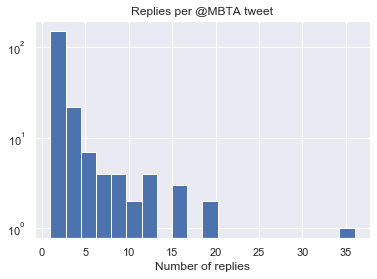

In [61]:
plt.hist(df_replies_tweets['replies'].str.len(), bins=20)
plt.xlabel('Number of replies')
plt.yscale('log') # ask Mukesh how sinful this is! :)
plt.title('Replies per @MBTA tweet')
plt.show()

In [64]:
documents = df_replies_tweets.replies.apply(lambda s: '-'.join(s))
documents

1214341706507866112    @MBTA This just happened again with the 558 bu...
1214516247204974593    @MBTA Two train sets running restricted and Ca...
1216842445465493506    @MassGovernor @MBTA @bgcboston Free?  How abou...
1217436548750303232    @MBTA Mechanical problems! 🤬🤬🤬🤬-@MBTA Does thi...
1217439170169376768    @MBTA That’s a lie. Cmon be honest @FixTheMBTA...
                                             ...                        
1220117213690191873    @MBTA @kenjimallon Maybe someone from the T co...
1220119381650350081    @MBTA @OrangeJackius Gates shouldn't have to b...
1220133458716123138                             @MBTA @JosephLee86 Ya ok
1220142048348602374    @MBTA SNAFU...-@MBTA You guys are consistently...
1220146758883344384    @MBTA Bus 1428. It’s a handrail and its causin...
Name: replies, Length: 200, dtype: object

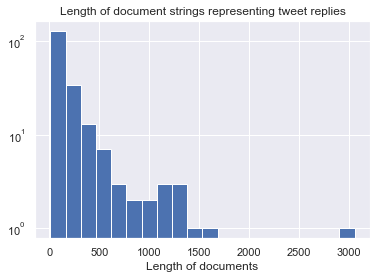

In [67]:
plt.hist(documents.str.len(), bins=20)
plt.xlabel('Length of documents')
plt.yscale('log')
plt.title('Length of document strings representing tweet replies')
plt.show()

## TF-IDF

In [107]:
# Define helper method to run TfidfVectorizer with n-gram option

def print_top_n_grams(docs, n=1):
    """Vectorize and print top 5 n-grams
    docs -- list of documents, in this case all replies to a tweet
    n -- n-gram to be passed to vectorizer
    """
    vectorizer = TfidfVectorizer(ngram_range=(n, n))
    vectors = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)
    df
    print(f"TOP {n}-grams: \n{df.sum().sort_values(ascending=False)[:5]}")

In [108]:
[print_top_n_grams(documents, i) for i in range(1,5)]

TOP 1-grams: 
mbta    21.919216
the     17.055935
you     11.522274
to       9.990121
co       9.677295
dtype: float64
TOP 2-grams: 
https co        7.624027
thank you       5.669091
mbta thank      3.247486
mbta mbta_cr    2.850750
mbta thanks     2.457246
dtype: float64
TOP 3-grams: 
mbta thank you        3.373136
mbta_cr thank you     2.121320
mbta mbta_cr thank    2.121320
the orange line       1.117180
you https co          1.112525
dtype: float64
TOP 4-grams: 
mbta mbta_cr thank you         3.0
mbta gottalovemo very niice    1.0
mbta heath street 7am          1.0
mbta josephlee86 ya ok         1.0
mbta okay thank you            1.0
dtype: float64


[None, None, None, None]

In [ ]:
# strip @-mentions?

## NMF (TODO)


In [ ]:
# csr matrix 

In [ ]:
# # Import NMF
# from sklearn.decomposition import NMF

# # Create an NMF instance: model
# model = NMF(n_components=6)

# # Fit the model to articles
# model.fit(articles)

# # Transform the articles: nmf_features
# nmf_features = model.transform(articles)

# # Print the NMF features
# print(nmf_features)